In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import itertools
from itertools import cycle

%load_ext autoreload
%autoreload 2

import helpers.helper as helpers
import grading.save_student_results as save_student_results

mpl.rc('figure', max_open_warning = 0)

%matplotlib inline

# Graded Exercise 1 

**Date: 05.04.2022**


Welcome to the first graded exercise.

You are asked to fill in the code in a couple of cells throughout the exercise. In the end of each cell where we ask you to fill in some code, you will notice a call to a function from the `save_student_results` module. This ensures that the body of your function is run with pre-generated data and your current results are saved to a file (which you will eventually submit to Moodle). The cells are independent of each other and you will receive points for each individual cell. We will not grant partial points within a cell.

Before you finish, please make sure to **upload two files to Moodle**:
* **graded_exercise_1.ipynb**
* **answers_SCIPER.npz (e.g. "answers_280595.npz")**

Good luck! :)

### Important: Enter your SCIPER number below and run the cell

In [2]:
sciper_number = 330593  # e.g. 123456
save_student_results.initialize_res(locals())

## Part 1: Linear Classification


### 1.1 Introducing the data

A new cafe has opened on campus and they sell homemade desserts. You notice that on some days, there are freshly baked cakes, and on other days the cakes are leftovers from the day before. Since you are a machine learning enthusiast, you'll try to predict when the cafe has freshly baked cakes. 

You start by collecting a dataset of $N=1000$ samples with $D=4$ features (shape$=N\times D$). The features are the following:

- the temperature of the previous day
- the total number of students who have had lunch in the cafeterias
- the total number of lecture hours on campus that day
- total number of times the coffee machines were used on campus

Our labels are $\mathbf{Y}$ (shape$=N$), where $\mathbf{y}_i = 1$ corresponds to a fresh-cake day and $\mathbf{y}_i = -1$ corresponds to leftover-cake day. 

We have done z-score normalization on the dataset for you by subtracting the mean of the features and dividing by the standard deviation.

We plot below 3 of the 4 features of this dataset:

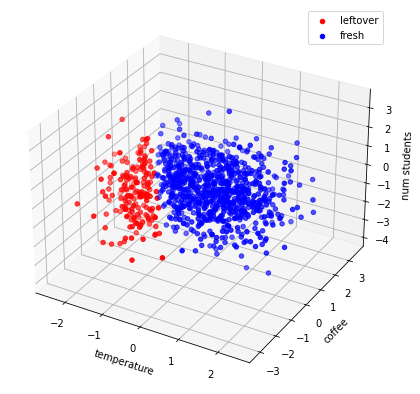

(1000, 4) (1000,)


In [3]:
X = np.load("./datasets/linear_classification/cake_data.npy")
y = np.load("./datasets/linear_classification/cake_labels.npy")

helpers.visualize_cake_data(X, y)
print(X.shape, y.shape)

### 1.2. Adding a bias feature

We would like to be able to predict a decision boundary that doesn't necessarily go through the origin. For this, we need to add a bias feature to the dataset. 

Currently we have our data $\mathbf{X}$ of shape $1000 \times 4$. We will concatenate the bias feature, which is a column vector of 1s, as the 0'th feature, i.e.:

$$\mathbf{\tilde{X}} = [ \mathbf{1}| \mathbf{X}]$$

Let's code this! Hint: You can use either `np.concatenate` or `np.hstack` to help you.

In [4]:
def add_bias_feature(X):
    """
    Concatenate to X a bias feature (column vector of 1s) as the 0th feature of X. 
    
    Args:
    -----
        X (array): array containing the N data points with D features, shape = (N, D).
    
    Returns:
    --------
        X_tilde (array): data points with concatenated bias feature, shape = (N, D+1).
    """
    #YOUR CODE HERE

    ones_array = np.array([np.ones(X.shape[0])])
    X_tilde = np.concatenate((ones_array.T, X), axis=1)
    return X_tilde

save_student_results.save_add_bias_feature(locals())

In [5]:
X_tilde = add_bias_feature(X)
print(X_tilde)
#It might be a good idea to check the 0th feature of X_tilda and make sure that it contains 1s.

[[ 1.         -0.7568879  -0.83257549 -0.38507599  1.35819868]
 [ 1.         -1.39720138 -0.63029694 -1.52949601 -0.47384888]
 [ 1.         -1.38330684 -1.05710469 -0.80095803 -0.73661268]
 ...
 [ 1.          1.84461211  1.53003801  2.24321906  1.63920996]
 [ 1.          0.46745633  0.17376031  0.17373447  0.11189541]
 [ 1.          1.82578454 -1.4181719   0.49433088 -0.29319877]]


Our new dataset $\mathbf{\tilde{X}}$ should be of shape $1000 \times 5$, so from now on, $D=5$.

### 1.3. Perceptron

Now we can focus on training a model to predict whether the cakes are fresh or left-overs. For this task, we would like you to train a perceptron model.

Let's recall the perceptron algorithm:

1. Initialize the weights.


2. Shuffle the dataset and iterate through the data points. 


3. For each data point, do a "perceptron step." 

      3.1. Check if the data point is correctly classified with the current weights. If it is correct, do nothing.
       
      3.2. If the data point is incorrectly classified, update the weights. 
      
      3.3. Normalize the weights of the model, **excluding the bias parameter.**
       
       
4. Continue steps 2-3 until all points are correctly classified.


Now let's implement this! 

We will start with the "perceptron step". It operates on a single data point. Fill in the empty parts of the `perceptron_step` function below.

Hint for the normalization: We saw in the course that the normalized weights correspond to: 

$$\mathbf{\tilde{w}} = \left[w_0 \, \Big|\, \frac{\mathbf{w}}{|| \mathbf{w} ||} \right] $$

To compute $|| \mathbf{w} ||$, you may use `np.linalg.norm`.

In [6]:
def perceptron_step(x, y, w):
    """
    Do one perceptron step for a single data point.
    
    Args:
    -----
        x (array): data point with D features, shape = (D,).
        y (int): ground truth label of the data point, either -1 or 1.
        w (array): parameters of the perceptron, shape = (D,).
    
    Returns:
    --------
        w_out (array): normalized perceptron parameters after the step, shape = (D,).
    """
    w_out = w.copy()
    if(w@x<0):
        w_out = w_out + y*x
        w_out[1:] = w_out[1:]/np.linalg.norm(w_out[1:])
    
    # Check if data is correctly classified
    return w_out

save_student_results.save_perceptron_step(locals())

In [7]:
## For you to test: Select a data sample:
data_sample_idx = 1
x_i = X_tilde[data_sample_idx,:]
y_i = y[data_sample_idx]
w = np.random.normal(0, 1, size=5)
w_new = perceptron_step(x_i, y_i, w)
print(w, w_new)

[ 0.12331329  2.48632963 -0.64218021 -1.18756144  0.11496657] [-0.87668671  0.98497079 -0.00301393  0.08672406  0.14933987]


Now let's code the prediction function of a perceptron. This function operates on the entire dataset and returns the predicted labels of each point, using the weights of the perceptron.

In [8]:
def perceptron_predict(X, w):
    """
    Predict the classes of the data points.
    
    Args:
    -----
        X (array): array containing the N data points with D features, shape = (N, D). 
        w (array): parameters of the perceptron, shape = (D,).
    
    Returns:
    --------
        predictions (array): predicted classes for the data, shape = (N,).
    """
    #YOUR CODE HERE
    predictions = X*w>=0
    return predictions.astype(int)

save_student_results.save_perceptron_predict(locals())

In [9]:
## For you to test: Select a data sample:
w = np.random.normal(0, 1, size=5)
y_pred = perceptron_predict(X_tilde, w)
print("First 50 predictions", y_pred[:50])

First 50 predictions [[1 0 1 1 0]
 [1 0 1 1 1]
 [1 0 1 1 1]
 [1 0 1 1 0]
 [1 0 1 1 1]
 [1 0 1 1 1]
 [1 0 1 1 1]
 [1 0 0 1 1]
 [1 0 0 1 0]
 [1 0 1 0 0]
 [1 0 1 1 1]
 [1 0 1 1 0]
 [1 0 0 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 1 0]
 [1 0 0 1 1]
 [1 0 0 1 0]
 [1 0 1 1 1]
 [1 0 0 0 1]
 [1 0 0 1 0]
 [1 0 1 0 0]
 [1 0 1 0 1]
 [1 0 1 1 0]
 [1 0 1 0 1]
 [1 0 0 1 0]
 [1 0 0 0 1]
 [1 0 1 0 0]
 [1 0 1 0 0]
 [1 0 0 0 1]
 [1 0 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 1 1]
 [1 0 1 1 1]
 [1 0 1 0 1]
 [1 0 1 1 1]
 [1 0 0 0 0]
 [1 0 1 1 1]
 [1 0 1 0 1]
 [1 0 1 0 1]
 [1 0 0 0 1]
 [1 0 0 0 0]
 [1 0 1 1 1]
 [1 0 1 1 0]
 [1 0 0 0 1]
 [1 0 0 1 1]
 [1 0 0 0 1]
 [1 0 1 1 0]]


Now we will put these together in the `perceptron` function. We have provided this function for you already. Run it and make sure everything works as expected!

In [10]:
def perceptron(X, y):
    """
    Train the perceptron based on the data
    
    Args:
    -----
        X (array): dataset, shape =(N, D)
        y (array): ground truth labels, either -1 or 1. Shape= (N,)
    
    Returns:
    --------
        w (array): normalized perceptron parameters, shape = (D,).
    """
    np.random.seed(21)
    
    # Check if data is correctly classified
    N,D = X.shape
    inds = np.arange(N)
    w = np.ones((D,))
    all_correct = False
    max_iter = 1000
    n_iter = 0
    
    while (not all_correct) and (n_iter < max_iter):
        np.random.shuffle(inds) 
        for i in inds:
            x_i = X[i,:]
            y_i = y[i]
            w = perceptron_step(x_i, y_i, w)
            
        y_pred = perceptron_predict(X, w)
        if np.sum(y_pred != y) == 0:
            all_correct = True
        n_iter += 1
        
        print("At epoch {}, number of incorrect classifications is {}".format(n_iter, np.sum(y_pred != y)))

    return w

At epoch 1, number of incorrect classifications is 1
At epoch 2, number of incorrect classifications is 1
At epoch 3, number of incorrect classifications is 1


C:\Users\loicm\AppData\Local\Temp/ipykernel_8380/151553135.py:32: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.sum(y_pred != y) == 0:
C:\Users\loicm\AppData\Local\Temp/ipykernel_8380/151553135.py:36: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print("At epoch {}, number of incorrect classifications is {}".format(n_iter, np.sum(y_pred != y)))


At epoch 4, number of incorrect classifications is 1
At epoch 5, number of incorrect classifications is 1
At epoch 6, number of incorrect classifications is 1
At epoch 7, number of incorrect classifications is 1
At epoch 8, number of incorrect classifications is 1
At epoch 9, number of incorrect classifications is 1
At epoch 10, number of incorrect classifications is 1
At epoch 11, number of incorrect classifications is 1
At epoch 12, number of incorrect classifications is 1
At epoch 13, number of incorrect classifications is 1
At epoch 14, number of incorrect classifications is 1
At epoch 15, number of incorrect classifications is 1
At epoch 16, number of incorrect classifications is 1
At epoch 17, number of incorrect classifications is 1
At epoch 18, number of incorrect classifications is 1
At epoch 19, number of incorrect classifications is 1
At epoch 20, number of incorrect classifications is 1
At epoch 21, number of incorrect classifications is 1
At epoch 22, number of incorrect c

At epoch 189, number of incorrect classifications is 1
At epoch 190, number of incorrect classifications is 1
At epoch 191, number of incorrect classifications is 1
At epoch 192, number of incorrect classifications is 1
At epoch 193, number of incorrect classifications is 1
At epoch 194, number of incorrect classifications is 1
At epoch 195, number of incorrect classifications is 1
At epoch 196, number of incorrect classifications is 1
At epoch 197, number of incorrect classifications is 1
At epoch 198, number of incorrect classifications is 1
At epoch 199, number of incorrect classifications is 1
At epoch 200, number of incorrect classifications is 1
At epoch 201, number of incorrect classifications is 1
At epoch 202, number of incorrect classifications is 1
At epoch 203, number of incorrect classifications is 1
At epoch 204, number of incorrect classifications is 1
At epoch 205, number of incorrect classifications is 1
At epoch 206, number of incorrect classifications is 1
At epoch 2

At epoch 375, number of incorrect classifications is 1
At epoch 376, number of incorrect classifications is 1
At epoch 377, number of incorrect classifications is 1
At epoch 378, number of incorrect classifications is 1
At epoch 379, number of incorrect classifications is 1
At epoch 380, number of incorrect classifications is 1
At epoch 381, number of incorrect classifications is 1
At epoch 382, number of incorrect classifications is 1
At epoch 383, number of incorrect classifications is 1
At epoch 384, number of incorrect classifications is 1
At epoch 385, number of incorrect classifications is 1
At epoch 386, number of incorrect classifications is 1
At epoch 387, number of incorrect classifications is 1
At epoch 388, number of incorrect classifications is 1
At epoch 389, number of incorrect classifications is 1
At epoch 390, number of incorrect classifications is 1
At epoch 391, number of incorrect classifications is 1
At epoch 392, number of incorrect classifications is 1
At epoch 3

At epoch 526, number of incorrect classifications is 1
At epoch 527, number of incorrect classifications is 1
At epoch 528, number of incorrect classifications is 1
At epoch 529, number of incorrect classifications is 1
At epoch 530, number of incorrect classifications is 1
At epoch 531, number of incorrect classifications is 1
At epoch 532, number of incorrect classifications is 1
At epoch 533, number of incorrect classifications is 1
At epoch 534, number of incorrect classifications is 1
At epoch 535, number of incorrect classifications is 1
At epoch 536, number of incorrect classifications is 1
At epoch 537, number of incorrect classifications is 1
At epoch 538, number of incorrect classifications is 1
At epoch 539, number of incorrect classifications is 1
At epoch 540, number of incorrect classifications is 1
At epoch 541, number of incorrect classifications is 1
At epoch 542, number of incorrect classifications is 1
At epoch 543, number of incorrect classifications is 1
At epoch 5

At epoch 715, number of incorrect classifications is 1
At epoch 716, number of incorrect classifications is 1
At epoch 717, number of incorrect classifications is 1
At epoch 718, number of incorrect classifications is 1
At epoch 719, number of incorrect classifications is 1
At epoch 720, number of incorrect classifications is 1
At epoch 721, number of incorrect classifications is 1
At epoch 722, number of incorrect classifications is 1
At epoch 723, number of incorrect classifications is 1
At epoch 724, number of incorrect classifications is 1
At epoch 725, number of incorrect classifications is 1
At epoch 726, number of incorrect classifications is 1
At epoch 727, number of incorrect classifications is 1
At epoch 728, number of incorrect classifications is 1
At epoch 729, number of incorrect classifications is 1
At epoch 730, number of incorrect classifications is 1
At epoch 731, number of incorrect classifications is 1
At epoch 732, number of incorrect classifications is 1
At epoch 7

At epoch 867, number of incorrect classifications is 1
At epoch 868, number of incorrect classifications is 1
At epoch 869, number of incorrect classifications is 1
At epoch 870, number of incorrect classifications is 1
At epoch 871, number of incorrect classifications is 1
At epoch 872, number of incorrect classifications is 1
At epoch 873, number of incorrect classifications is 1
At epoch 874, number of incorrect classifications is 1
At epoch 875, number of incorrect classifications is 1
At epoch 876, number of incorrect classifications is 1
At epoch 877, number of incorrect classifications is 1
At epoch 878, number of incorrect classifications is 1
At epoch 879, number of incorrect classifications is 1
At epoch 880, number of incorrect classifications is 1
At epoch 881, number of incorrect classifications is 1
At epoch 882, number of incorrect classifications is 1
At epoch 883, number of incorrect classifications is 1
At epoch 884, number of incorrect classifications is 1
At epoch 8

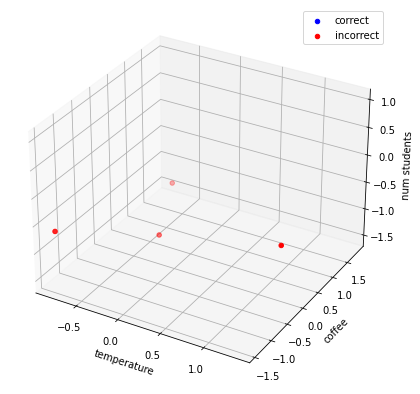

In [11]:
w = perceptron(X_tilde, y)
y_pred = perceptron_predict(X_tilde, w)
helpers.visualize_cake_data_predictions(X, y, y_pred)

### 1.4 Find the margin

If the perceptron correctly classifies the points, we can define the margin, i.e. the smallest **unsigned** distance between the decision boundary and the data points. Your final task is to fill in the function `get_margin` which finds and returns this value.

Note that the weights array the function takes is already normalized.

In [12]:
def get_margin(X, y, w):
    """
    Return the margin between the data and the decision boundary.
    
    Args:
    -----
        X (array): array containing the N data points with D features, shape = (N, D).
        y (array): ground truth labels, either -1 or 1. Shape= (N,)
        w (array): normalized perceptron parameters, shape = (D,).
    
    Returns:
    --------
        margin (float): margin between X and the perceptron decision boundary.
    """
    #YOUR CODE HERE
    margin = np.sum(w*X)
    return margin

save_student_results.save_get_margin(locals())

In [13]:
margin = get_margin(X_tilde, y, w)
print("Margin is", margin)

Margin is 3000.0


## Part 2: K-Means

### 2.1 Introducing the data

In this exercise, we will practice our skills and knowledge about one of the most popular clustering algorithms. Throughout the tasks below, we assume that the data you're working with has following structure and consists of following parts:

* **X** is an array of 2-dimentional vectors, therefore it has shape $N \times 2$
* **centers** is an array of the centers found through K-Means (also 2-dimentional vectors), it has shape $K \times 2$
* **labels** is an array of labels assigned to **X** (therefore, array of integers), its shape is $(N,)$

Below you can see an example of generated data with $N=100$ and clustered with $K=5$, therefore with 100 elements and 5 centers. 

In [14]:
K = 5
X = np.load("./datasets/kmeans_blobs/blobs_data.npy")
centers = np.load(f"./datasets/kmeans_blobs/clusters_centers_{K}.npy")

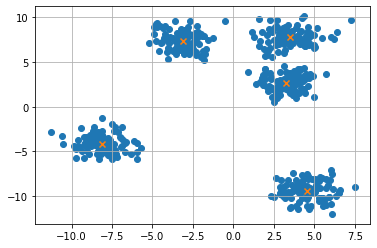

In [15]:
helpers.visualize_blob_data(X, C=centers)

### 2.2 Finding Clusters Assignments

Given samples coordinates **X** and cluster **centers**, we want to implement one of the important steps of training and inference for K-Means. Namely, for every point in **X** we want to assign a label based on the closest center.

In this task, we will use conventional euclidean distance: $$d(x, y) = \sqrt{\sum_{i} (x_i - y_i) ^ 2}$$

Hint: You can use `np.argmin` and `np.sqrt` to help you.

In [16]:
def find_labels(X, centers):
    """
        Function definition: 
            Given points X and clusters centers, find label assignments.
        
        args:
            X (np.array): Data array of shape (N, D)
            centers (np.array): Array of cluster centers of shape (K, D)
        returns:
            labels (np.array): Cluster assignment labels array of shape (N,)
    """
    # YOUR CODE HERE
    K = centers.shape[0]
    distance = np.zeros((X.shape[0], K))
    for k in range(K):
        # compute the euclidean distance for each data to each center
        center_k = centers[k, :]
        l2distance_k = np.sqrt(((X - center_k)**2).sum(axis=1))
        distance[:, k] = l2distance_k
        
    labels = np.argmin(distance, axis=1)
    
    
    return labels

save_student_results.save_find_labels(locals())

Let's visualize our results, you should get 5 different and visually separable clusters of different colours.

In [17]:
labels = find_labels(X, centers)

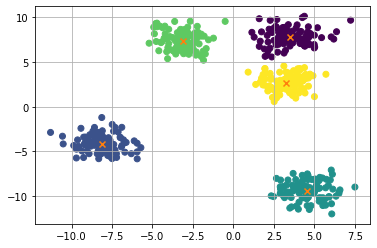

In [18]:
helpers.visualize_blob_data(X, labels, C=centers)

### 2.3 Average Within Cluster Distance

In this task, we will figure our how well our K-Means model works. Since K-Means has several major parameters (like number of clusters **K** or type of distances), sometimes it's important to find the best choice for them. One of the efficient ways to do that is Average Within Cluster Distance (AWCD). This metric is calculated after the model is trained and labels for samples are assigned.

Formally, this metric is equal to average distance from points in **X** to their corresponding centroids:

$$\text{AWCD} = \frac{1}{N} \sum_{i} d(x_i, c_i)$$

where $x_i$ is $i$'th sample and $c_i$ its corresponding center, $d(x, y)$ is the euclidean norm.

Hint: You can use `np.linalg.norm` to help you.

In [19]:
def average_within_cluster_distance(X, centers, labels):
    """
        Function definition: 
            Given points X, clusters centers and labels, find the average within cluster distance.
        
        args:
            X (np.array): Data array of shape (N, D)
            centers (np.array): Array of cluster centers of shape (K, D)
            labels (np.array): Cluster assignment labels array of shape (N,)
        returns:
            avg_dist (float): Average within cluster distance
    """
    # YOUR CODE HERE
    
    
    
    return avg_dist

save_student_results.save_average_cluster_distance(locals())

NameError: name 'avg_dist' is not defined

Using your implementation, lets find out what would be the best choice of **K** for the data above. For that, we've already trained several K-Means models with different **K**. Having both coordinates of centroids and assigned labels, we can calculate the AWCD and pick the best performing parameters.

In [ ]:
avg_distances = []
for i in range(1, 9):
    labels = np.load(f"./datasets/kmeans_blobs/clusters_labels_{i}.npy")
    centers = np.load(f"./datasets/kmeans_blobs/clusters_centers_{i}.npy")
    avg_distance = average_within_cluster_distance(X, centers, labels)
    avg_distances.append(avg_distance)
print("Average distances are", avg_distances)
helpers.visualize_avg_distances(avg_distances)

This plot demonstrates, after $K=5$ average distance stops improving significantly, though larger $K$ generate more complex predictions. Therefore, $K=5$ could be considered as the best choice (also conventionally it's called elbow point).

## Part 3: K-Nearest-Neighbor (kNN) Classifier



### 3.1 Introducing the data

In this execrise, you'll implement a kNN classifier for high-dimensional image data from the CIFAR-10 dataset. The original CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes. Below you can see some random examples from this dataset. All classes are common stuff in our daily life and they are completely mutually exclusive.


![CIFAR image](datasets/knn/cifar.png) 



However, do not worry about how to deal with a 'big data' problem today. We've prepared a small subset of CIFAR-10 for you in this exercise, downsampled to 16x16 pixels. You can definitely work with it on your own laptop. 

By loading the data with the codes below, you'll find the training data `X_train` contains 1000 data entries, and each one of them is a 256 dimensional vector. You'll also find the corresponding class labels `y_train` for the training data, which are integers. Your goal is to classify the given test data `X_test` with your implemented kNN classifier.

In [ ]:
X_train = np.load('datasets/knn/graded_exe_1_knn_train_data.npy')
y_train = np.load('datasets/knn/graded_exe_1_knn_train_label.npy')
X_test = np.load('datasets/knn/graded_exe_1_knn_test_data.npy')
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print('Training data shape: ', X_train.shape, ', data type: ', X_train.dtype)
print('Training labels shape: ', y_train.shape, ', data type: ', y_train.dtype)
print('Test data shape: ', X_test.shape, ', data type: ', X_test.dtype)

We first pre-process the data by normalizing it.

In [ ]:
mean = X_train.mean(axis=0, keepdims=True)
std = X_train.std(axis=0, keepdims=True)
X_train_preprocessed = (X_train - mean) / std
X_test_preprocessed = (X_test - mean) / std

### 3.2 Building Distance Metrics
For high dimentional data, effectively measuring the distance between two vectors are difficult due to the 'curse of dimensionality'. You may find different nearest neighborhood by using different distance metrics. In this exercise, you'll see how different distances make a difference to your kNN classifier. Let's start from two simple cases.

First, you'll implement the euclidean distance (which you are already familiar with from Part 2), which is also called the L2 distance. For any two $d$-dimensional feature vector $\mathbf x$ and $\mathbf y$, their L2 distance is defined as,

$$
D_{L2}(\mathbf{x}, \mathbf{y}) = \sqrt{ \sum_{i=1}^d \left(x_i - y_i\right)^2 } \,\,.
$$

where $x_i$ is the $i$th dimension of $\mathbf x$, and similarly for $y_i$ and $\mathbf y$.

In [ ]:
def L2_dist(v_i, v, p=2):
    """
    Function to compute the Euclidean distance between a single example
    vector and all datapoints

    Inputs:
        v_i (np.array): single example vector shape (D,)
        v (np.array): all datapoints shape (N,D)
        p: Do NOT use this argument in your function.
            It is a useless argument, we are only using it to 
            keep our function definitions uniform. (Later on in the exercise, we
            will introduce another distance function, which needs a parameter p)

    Outputs:
        dist (np.array): return distance vector of shape (N,)
    """
    # WRITE YOUR CODE HERE
    
    dist= np.sqrt(((v - v_i)**2).sum(axis=1))
    
    return dist

save_student_results.save_L2_dist(locals())

In [ ]:
#small test for you
v_i= np.random.normal(0,1,size=(4))
v= np.random.normal(0,1,size=(20,4))
dist = L2_dist(v_i, v)
print("L2 dist is", dist)

Another distance you might have known is the Manhattan distance, or L1 distance:
$$
D_{L1}(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^d | x_i - y_i | \,\,.
$$

In [ ]:
def L1_dist(v_i, v, p=1):
    """
    Function to compute the Manhatten distance between a single example
    vector and all datapoints

    Inputs:
        v_i (np.array): single example vector shape (D,)
        v (np.array): all datapoints shape (N,D) 
        p: Do NOT use this argument in your function.
            It is a useless argument, we are only using it to 
            keep our function definitions uniform. (Later on in the exercise, we
            will introduce another distance function, which needs a parameter p)
        
    Outputs:
        dist (np.array): return distance vector of shape (N,)
    """
    # WRITE YOUR CODE HERE
        
    dist= np.absolute((v - v_i).sum(axis=1))
    
    return dist

save_student_results.save_L1_dist(locals())

In [ ]:
#small test for you
v_i= np.random.normal(0,1,size=(4))
v= np.random.normal(0,1,size=(20,4))
dist = L1_dist(v_i, v)
print("L1 dist is", dist)

### 3.3 Building kNN Classifiers

With these two distance functions, you can build two kNN classifiers now. 

First let's complete the missing parts in the function `kNN_one_example_with_distance_func`. This function will run the kNN algorithm on a single data point. 

This function takes another function as input (a distance function such as the L2 or L1 as you coded above). Below we have provided an example for you to see how to give a function as an argument:  (note that `function_to_print` is not called with parenthesis when given as an argument to `function_taking_a_function`!)

In [ ]:
def function_taking_a_function(func, b, c):
    """Apply func to the sum of b and c."""
    func(b+c)

def function_to_print(a):
    """Print a"""
    print(a)
    
# This will apply function_to_print to the sum of 3 and 5
function_taking_a_function(function_to_print, 3, 5)

In [ ]:
def kNN_one_example_with_distance_func(unlabeled_example, distance_function, data, labels, k, p):
    """
    Returns the label of single unlabeled_example.
    
    Inputs:
        unlabeled_example (np.array): single data point of shape (D,)
        distance_function (function): The function which will be used to compute distance.
            Ex: L1_dist or L2_dist
        data (np.array): dataset of shape (N,D)
        labels (np.array): labels of the dataset, of shape (N,)
        k (int): number of neighbors 
        p (float): Parameter for some distance functions.
                    Pass this argument to your distance function.

    Outputs:
        most_freq_neighbor (int): label of the most frequent neighbor
    """
    distances = distance_function(unlabeled_example, data, p) 
    # WRITE YOUR CODE HERE
    
    # Find neighbors
    nn_indices = np.argsort(distances)[:k]    
    
    # Get neighbors' labels
    neighbor_labels = labels[nn_indices] 
    
    # Pick the most common
    most_freq_neighbor = np.argmax(np.bincount(neighbor_labels))
    

    
    return most_freq_neighbor

save_student_results.save_kNN_one_example_with_distance_func(locals())

In [ ]:
#we provide the kNN function for you
def kNN(distance_function, test_data, training_data, training_labels, k, p):
    """
    Run kNN on the whole test data based on the labels of the training data
    """
    return np.apply_along_axis(kNN_one_example_with_distance_func, 1, test_data, 
                               distance_function, training_data, training_labels, k, p)

Now you can directly try these two classifiers on the test data! 
For this exercise, we will be using the k=3 nearest neighbours.

In [ ]:
k_for_knn = 3
y_test_pred_L1_knn = kNN(L1_dist, X_test_preprocessed, X_train_preprocessed, y_train, k_for_knn, p=1)
y_test_pred_L2_knn = kNN(L2_dist, X_test_preprocessed, X_train_preprocessed, y_train, k_for_knn, p=2)

print(y_test_pred_L1_knn)
print(y_test_pred_L2_knn)

### 3.4 Extending the L1 and L2 Distances

Now you might be wondering: besides L1 and L2 distances, do we have anything like L3, L4, ..., $L_{\infty}$? The answer is **yes**! The Minkowski distance, or the Lp distance, is at your service,

$$
D_{L_p}(\mathbf{x}, \mathbf{y}) = \left( \sum_{i=1}^d \left|\mathbf{x}_i - \mathbf{y}_i\right|^p \right) ^{\frac{1}{p}} \,\,.
$$

This distance metric is parameterized by $p$. Manhattan and euclidean distances are Lp distance's special cases when $p=1$ and $p=2$, respectively.

Below we give you the implementation of the Lp distance, with a little bit tuning on the speed performance.

Then please implement the KNN classifier with the Lp distance.

In [ ]:
def Lp_dist(v_i, v, p):
    """
    Function to compute the Lp distance between a single example
    vector and all datapoints

    Inputs:
        v_i (np.array): single example vector shape (D,)
        v (np.array): all datapoints shape (N,D) 
        p (float): The p value in Lp distance 
        
    Outputs:
        dist (np.array): return distance vector of shape (N,)
    """
    
    assert p > 0, 'Lp norm requires p > 0'
    if(type(p) == int):
        abs_diff = np.abs(v_i - v)
        dist = 1
        for i in range(p):
            dist = dist * abs_diff
        return (dist.sum(axis=1)) ** (1/p)
    else:
        return ((np.abs(v_i - v) ** p).sum(axis=1)) ** (1/p)
    
# Test for a given p
p = 2
y_test_pred_Lp_knn = kNN(Lp_dist, X_test_preprocessed, X_train_preprocessed, y_train, k_for_knn, p)


### 3.5 Cross Validation

We've learned how to select the number of nearest neighboods for kNN classifiers. However, the cross validation can be used to tune many other hyperparameters, for example, the $p$ in our $L_p$ distance. Hopefully we can discover a distance metric better than euclidean and Manhattan distances.

Now let's implement the cross validation tool to test given $k$ and $p$ values.

In [ ]:
# a metric to evaluate the performance of a model
def acc_func(y_pred, y_gt):
    '''
        Function to calculate the accuracy
    '''
    num_correct = np.sum(np.equal(y_pred, y_gt))
    accuracy = float(num_correct) / y_gt.shape[0]
    return accuracy

def KFold_cross_validation_KNN_for_p(X, Y, K_for_folds, p):
    '''
    K-Fold Cross validation function for K-NN.
    This function uses `Lp_dist` as a distance function.
    
    Inputs:
        X : training data
        Y: training labels
        K_for_folds: number of folds (K in K-fold)
        p: parameter for the Lp norm distance
        
    Returns:
        Average validation accuracy for the selected p.
    '''
    
    #We will set the number of neighbours to 3
    k_for_knn = 3
    
    #all the indices of the training dataset
    all_ind = np.arange(X.shape[0])
    split_size = X.shape[0]//K_for_folds
    
    ave_acc = 0    
    for fold_ind in range(K_for_folds):
        #Split the data into training and validation folds:
        val_ind = all_ind[fold_ind*split_size:(fold_ind+1)*split_size]
        train_ind = np.setdiff1d(all_ind, val_ind, assume_unique=True)
        
        X_train_fold = X[train_ind,:]
        Y_train_fold = Y[train_ind]
        X_val_fold = X[val_ind,:]
        Y_val_fold = Y[val_ind]

        # Run KNN using the data folds you found above and save the result
        # WRITE YOUR CODE HERE
        Y_val_fold_pred = kNN(Lp_dist, X_val_fold, X_train_fold, Y_train_fold, k_for_knn, p)
        ave_acc += np.mean(Y_val_fold_pred == Y_val_fold)

    
    #Find the average validation accuracy over K:
    ave_acc = ave_acc/K_for_folds
    return ave_acc

save_student_results.save_KFold_cross_validation_KNN_for_p(locals())

Then run a 5-fold cross validation and find the best $p$ value from the candidate list. We have written the script to do this for you.

Note that since you are working with a 'not-very-big' data, this may take you around 15 seconds to one minute based on the power of your CPU.

In [ ]:
K_for_kfold_cross_validation = 5
candidate_p=[0.5, 1, 1.5, 2, 5]

acc_list = []
for p in candidate_p:
    acc_list.append(KFold_cross_validation_KNN_for_p(X_train_preprocessed, y_train, K_for_kfold_cross_validation, p))

best_p = candidate_p[np.array(acc_list).argmax()]
print ("The best p value is", best_p)